In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

sns.set_style("darkgrid")

In [26]:
train_df = pd.read_csv("dataset/train.csv", parse_dates=["date"])
original_train_df = train_df.copy()
test_df = pd.read_csv("dataset/test.csv", parse_dates=["date"])

In [27]:
display(train_df.head(3))
display(test_df.head(3))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers


In [28]:
def get_val_counts(df, column_name, sort_by_column_name=False):
  value_count = df[column_name].value_counts().reset_index().rename(columns={"count":"Value Count"}).set_index(column_name)
  value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
  value_count = value_count.reset_index()
  if sort_by_column_name:
    value_count = value_count.sort_values(column_name)
  return value_count

def plot_value_counts_pie(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  val_count_df.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");

def plot_value_counts_bar(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  f, ax = plt.subplots(figsize=(12, 6))
  sns.barplot(data=val_count_df, y="Value Count", x=column_name)
  
  for index, row in val_count_df.iterrows():
    count = row["Value Count"]
    percentage = row["Percentage"]
    ax.text(
      x=index,
      y=row["Value Count"] + max(val_count_df["Value Count"])*0.02,
      s=f"{count}({percentage:.2f}%)",
      ha="center",
      va="bottom"
    )
  
  

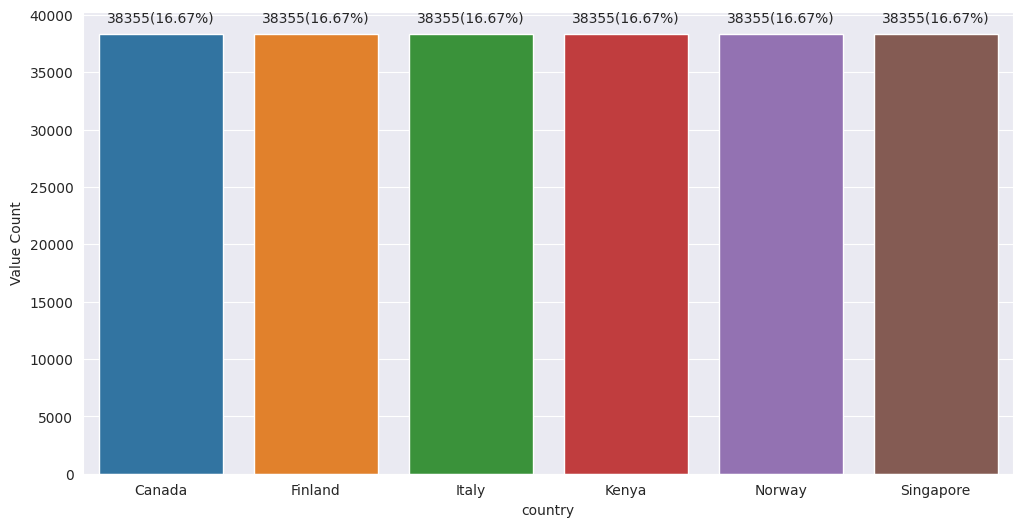

In [29]:
plot_value_counts_bar(train_df, "country")

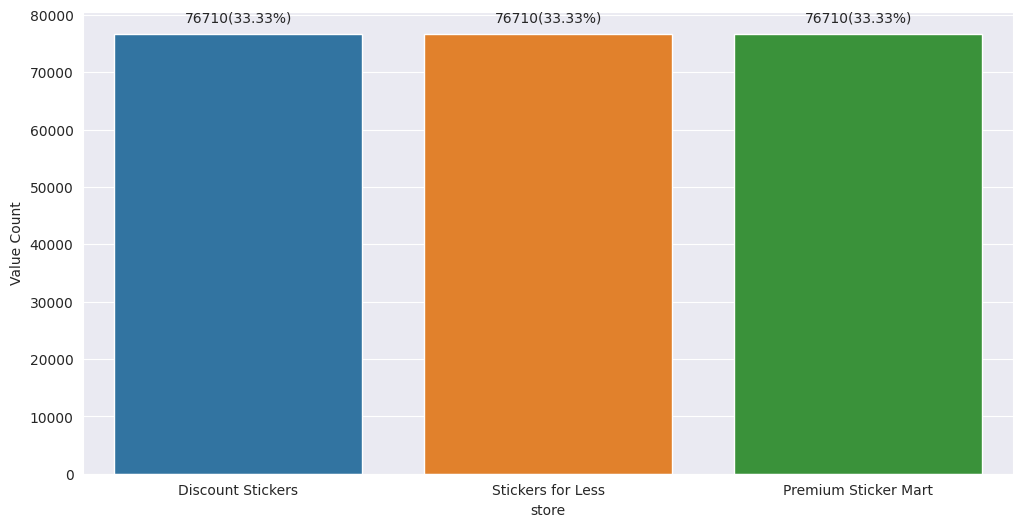

In [30]:
plot_value_counts_bar(train_df, "store")

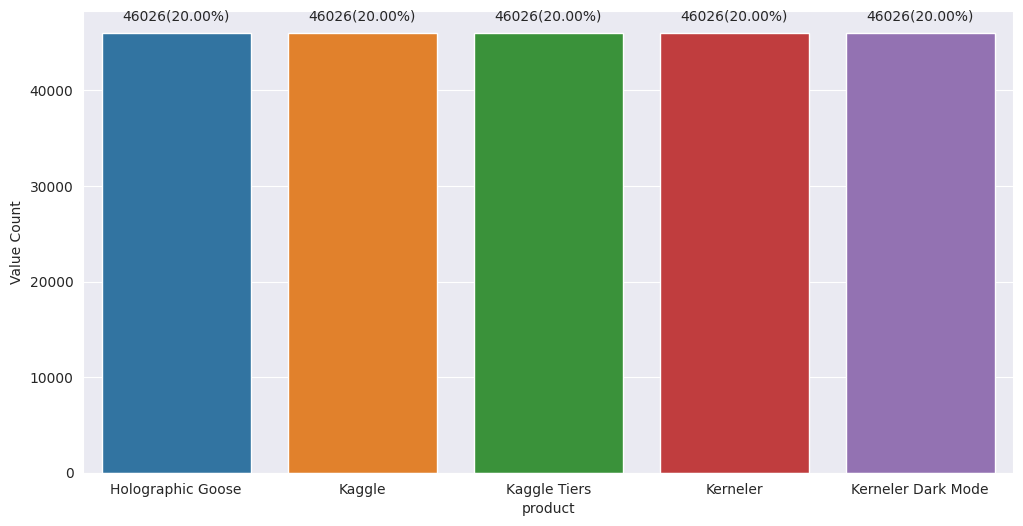

In [31]:
plot_value_counts_bar(train_df, "product")

In [32]:
counts = train_df.groupby(["country", "store", "product"])["id"].count().rename("num_rows").reset_index()
counts_val_counts = counts["num_rows"].value_counts().rename("Count").reset_index().rename(columns={"index":"length"})
display(counts_val_counts.head(10))

,num_rows,Count
0,2557,90


In [33]:
print(f"Number of missing num_sold rows: {train_df['num_sold'].isna().sum()}")

Number of missing num_sold rows: 8871


In [34]:
counts = train_df.groupby(["country", "store", "product"])["num_sold"].count().rename("num_rows")
missing_data = counts.loc[counts != 2557]
missing_data_df = missing_data.reset_index()
missing_data_df["num_missing_rows"] = 2557 - missing_data_df["num_rows"]
missing_data_df

,country,store,product,num_rows,num_missing_rows
0,Canada,Discount Stickers,Holographic Goose,0,2557
1,Canada,Discount Stickers,Kerneler,2556,1
2,Canada,Premium Sticker Mart,Holographic Goose,2177,380
3,Canada,Stickers for Less,Holographic Goose,1249,1308
4,Kenya,Discount Stickers,Holographic Goose,0,2557
5,Kenya,Discount Stickers,Kerneler,2494,63
6,Kenya,Discount Stickers,Kerneler Dark Mode,2556,1
7,Kenya,Premium Sticker Mart,Holographic Goose,1911,646
8,Kenya,Stickers for Less,Holographic Goose,1199,1358


undefined


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

undefined


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

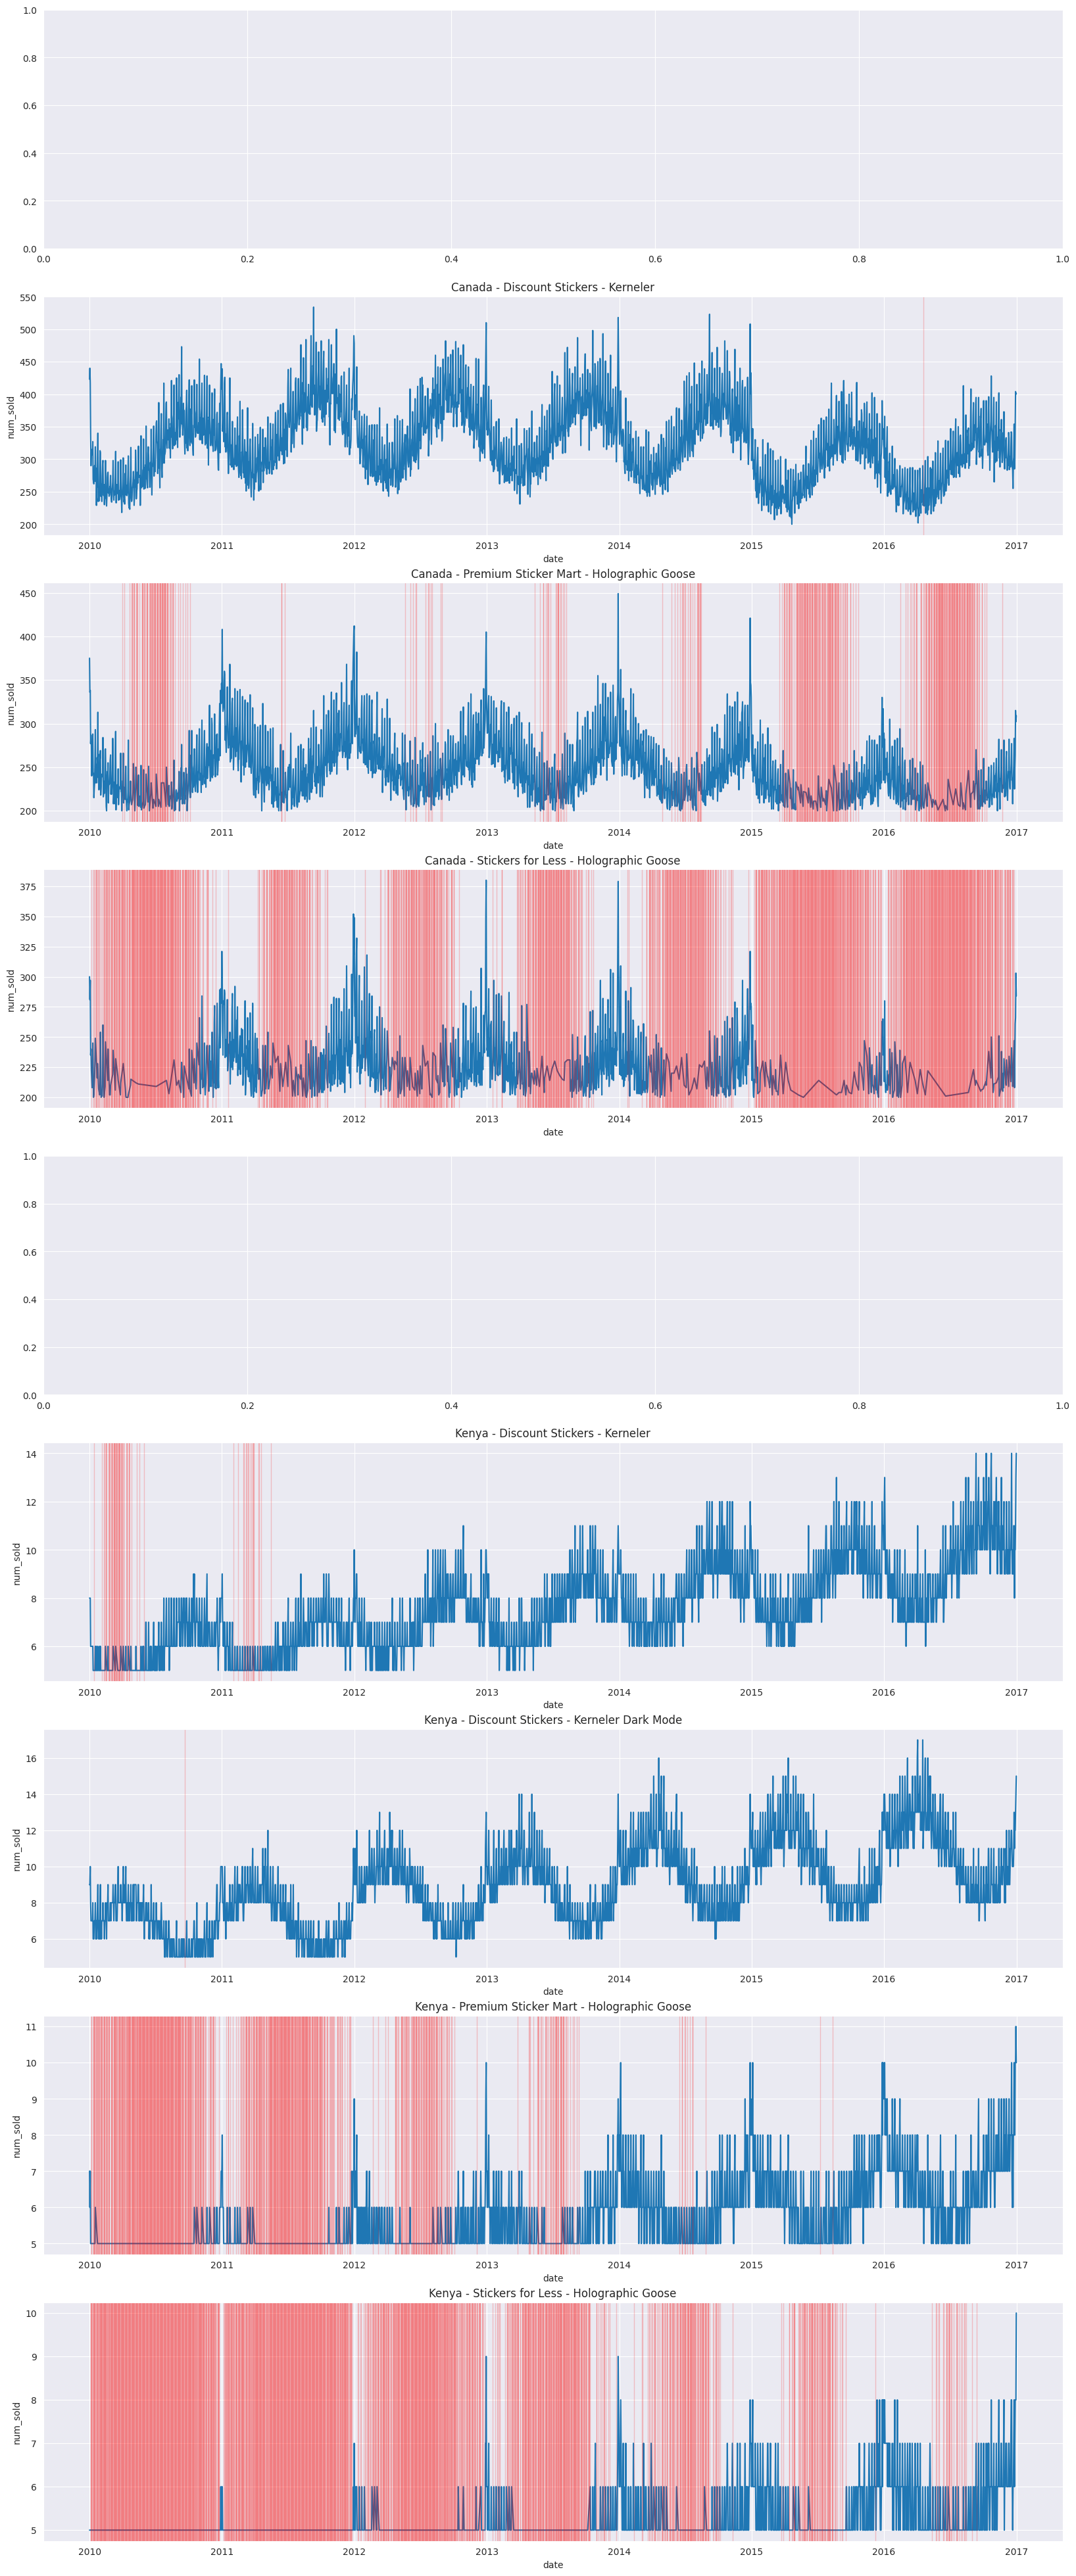

In [45]:
f,axs = plt.subplots(9,1, figsize=(20,50))
for i, (country, store, product) in enumerate(missing_data.index):
    plot_df = train_df.loc[(train_df["country"] == country) & (train_df["store"] == store) & (train_df["product"] == product)]
    missing_vals = plot_df.loc[plot_df["num_sold"].isna()]
    if plot_df["num_sold"].isna().all():
        print("undefined")
        continue
    sns.lineplot(data=plot_df, x="date", y="num_sold", ax=axs[i])
    for missing_date in missing_vals["date"]:
        axs[i].axvline(missing_date, color='red',  linestyle='-', linewidth=1, alpha=0.2)
    axs[i].set_title(f"{country} - {store} - {product}")

In [46]:
print("Train - Earliest date:", train_df["date"].min())
print("Train - Latest date:", train_df["date"].max())

print("Test - Earliest date:", test_df["date"].min())
print("Test - Latest date:", test_df["date"].max())

Train - Earliest date: 2010-01-01 00:00:00
Train - Latest date: 2016-12-31 00:00:00
Test - Earliest date: 2017-01-01 00:00:00
Test - Latest date: 2019-12-31 00:00:00


In [48]:
weekly_df = train_df.groupby(["country", "store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby(["country", "store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [52]:
def plot_all(df):
  f, axes = plt.subplots(3, 2, figsize=(25, 25), sharex=True, sharey=True)
  f.tight_layout()
  for n, prod in enumerate(df["product"].unique()):
    plot_df = df.loc[df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store", ax = axes[n//2, n%2])
    axes[n//2, n%2].set_title("Product:" + str(prod))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

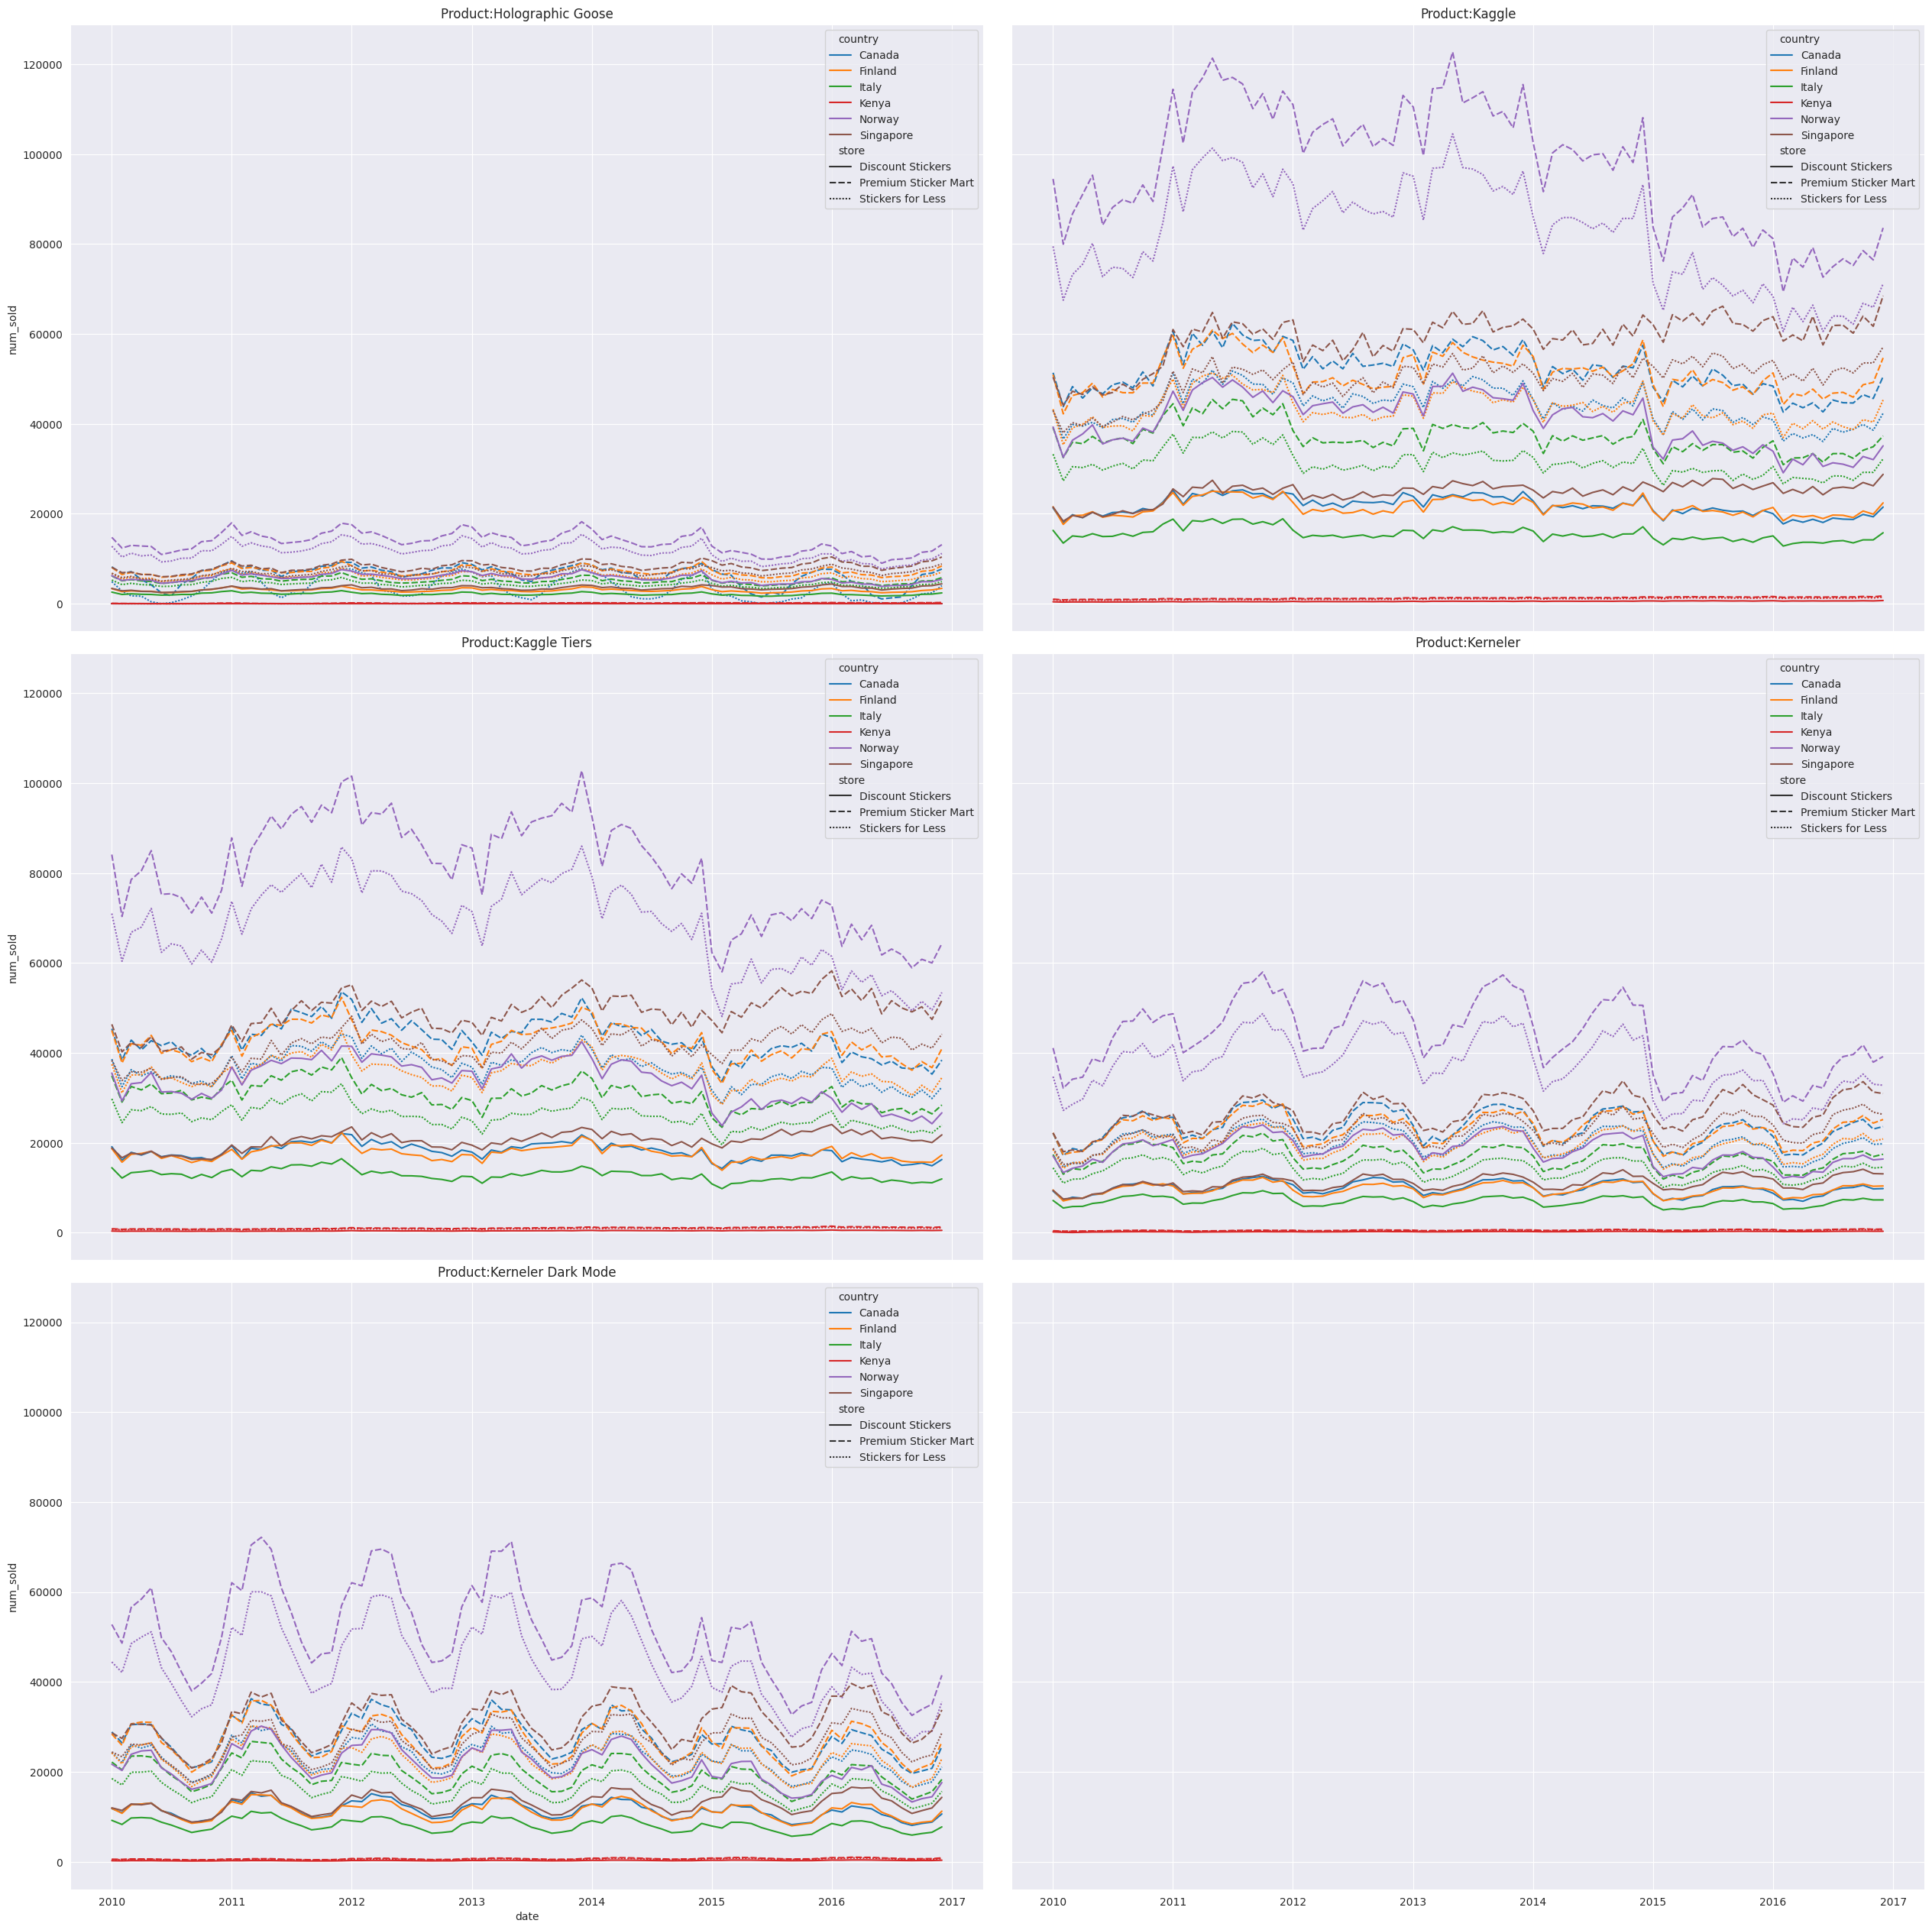

In [54]:
plot_all(monthly_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0, 0.5, 'Proportion of sales')

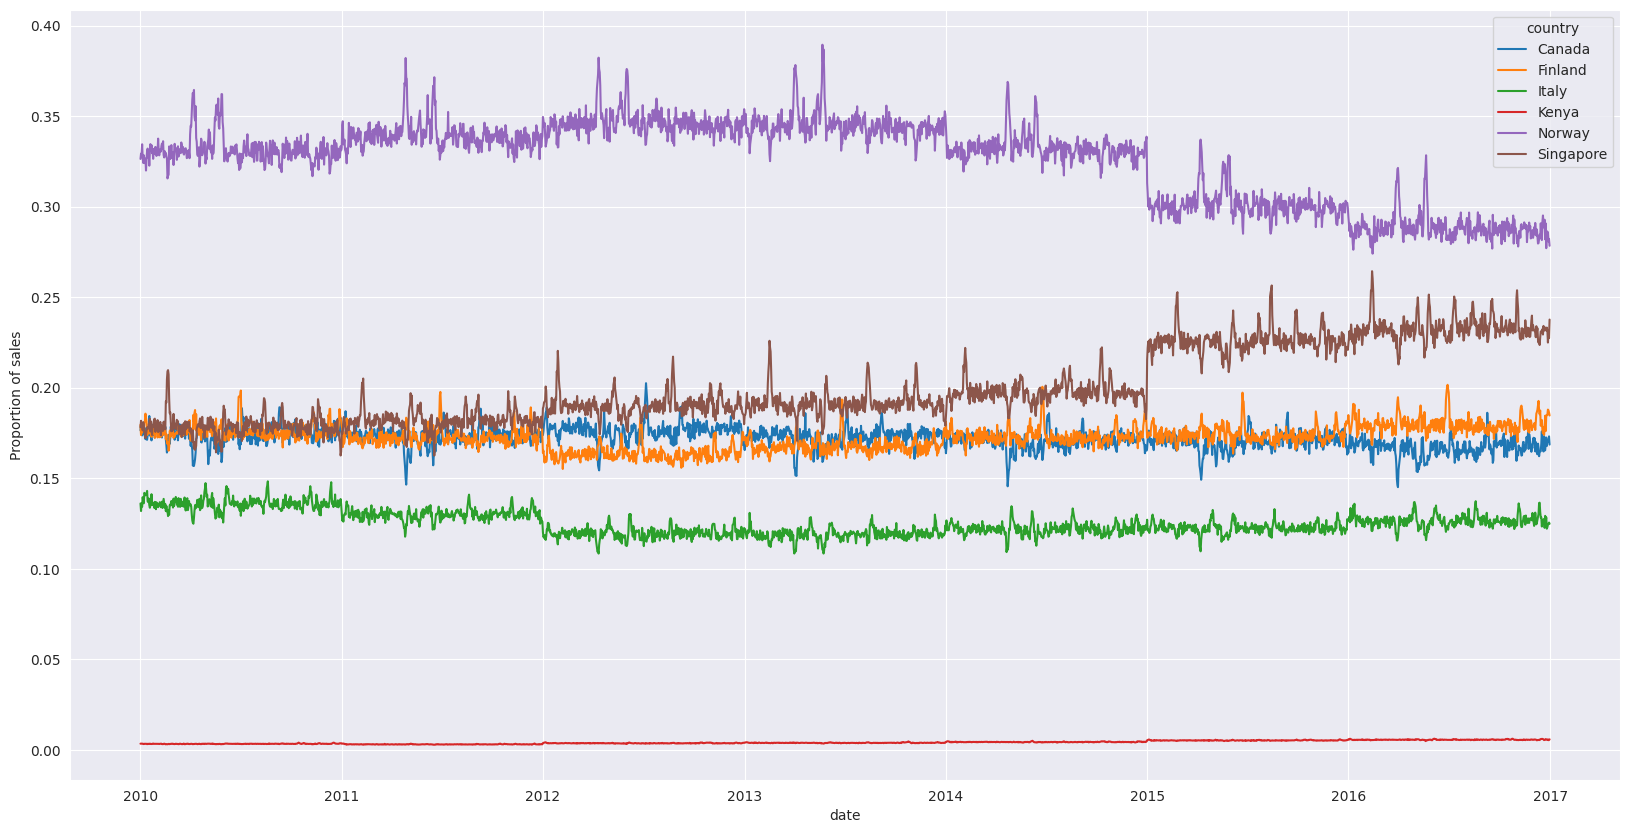

In [55]:
country_weights = train_df.groupby("country")["num_sold"].sum()/train_df["num_sold"].sum()

country_ratio_over_time = (train_df.groupby(["date", "country"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=country_ratio_over_time, x="date", y="num_sold", hue="country")
ax.set_ylabel("Proportion of sales")